## LP 2 - TEAM PARIS - Regression Project (Store Sales - Time Series Forecasting)

#### Importing libraries

In [2]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
import os
import glob

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Loading the data sets
transactions = pd.read_csv('transactions.csv', parse_dates=True)

train = pd.read_csv('train.csv', parse_dates=True)

test = pd.read_csv('test.csv', parse_dates=True)

stores = pd.read_csv('stores.csv')

oil = pd.read_csv('oil.csv', parse_dates=True)

holiday_events = pd.read_csv('holidays_events.csv', parse_dates=True)

sample_sub = pd.read_csv('sample_submission.csv')

In [ ]:
# Previewing the transactions data
transactions.head()

In [24]:
# Statistical Analysis of the Transaction Column
transactions = transactions['transactions']
print('Mean:', np.mean(transactions))
print('Median:', np.median(transactions))
print('Standard Deviation:', np.std(transactions))


Mean: 1694.6021583940208
Median: 1393.0
Standard Deviation: 963.28087448688


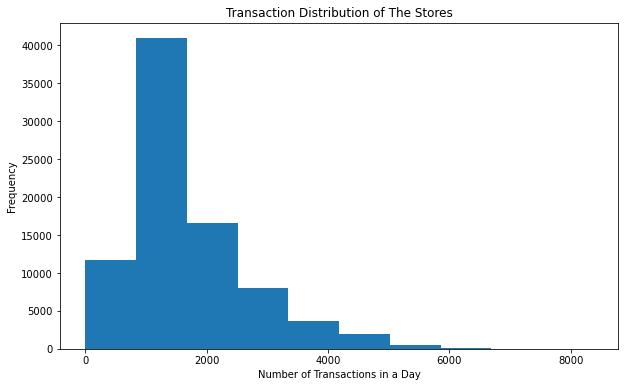

In [25]:
# Plot histogram of Transaction Distribution
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(transactions)
plt.title('Transaction Distribution of The Stores')
plt.xlabel('Number of Transactions in a Day')
plt.ylabel('Frequency')
plt.show()


The above plot shows a distribution of the daily transactions made across the all the stores.
In essence, the highest number of sales in a day would fall within a range of 1,000 to 2,000 occuring about 40,000 times.

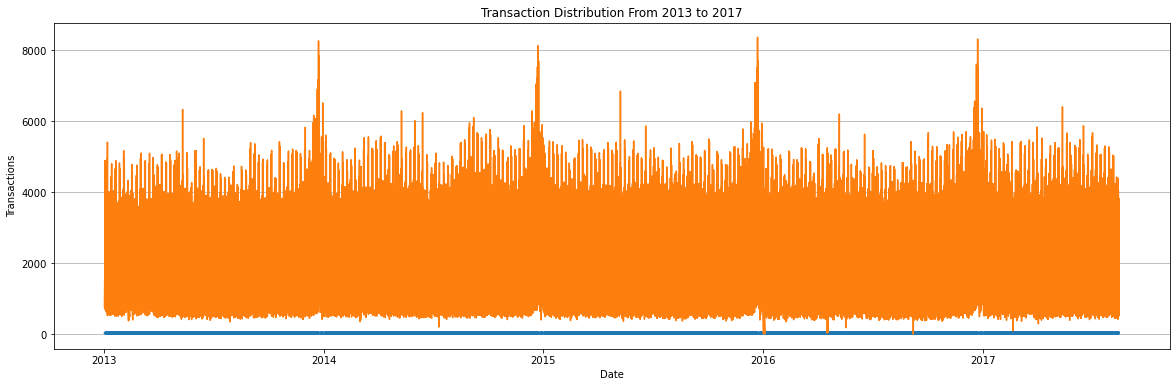

In [26]:
# Distribution plot of transactions
transactions = pd.read_csv('transactions.csv', index_col=["date"], parse_dates=True)

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(transactions)
ax.set_title('Transaction Distribution From 2013 to 2017')
ax.grid(axis='y')
ax.set_xlabel('Date')
ax.set_ylabel('Transactions')
plt.show()


#### The above graph shows a spike in transactions in the early periods of each year which would indicate that transactions were more during holidays/christmas seasons in december/january of each year. 

<AxesSubplot:xlabel='transactions'>

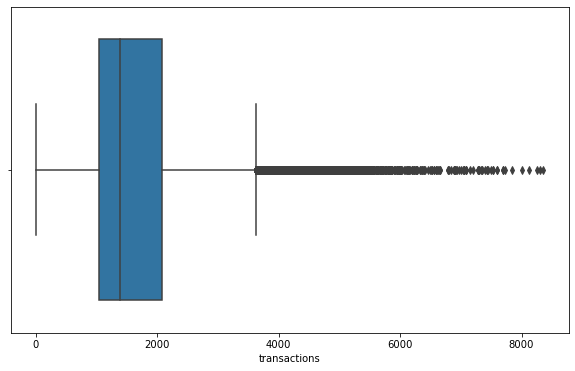

In [27]:
# Boxplot Distribution
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x=transactions['transactions'])


#plt.boxplot(transactions)
#plt.title('Transactions Boxplot')
#plt.show()

# Create boxplot of a single variable


##### Univariate Analysis of The Store Data

In [29]:
# Preview the top rows
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [30]:
#Inspecting the unique values of the 'store_nbr" column
stores['store_nbr'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [31]:
#Inspecting the unique values of the 'type" column
stores['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [32]:
stores['type'].nunique()

5

In [33]:
# Taking a count of the unique values in the city column
city_count = stores['city'].value_counts()
print(city_count)


Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64


In [34]:
#Inspecting the unique values of the 'state" column
stores['state'].nunique()

16

In [35]:
# Taking a count of the unique values in the "state" column
state_count= stores['state'].value_counts()
print(state_count)


Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64


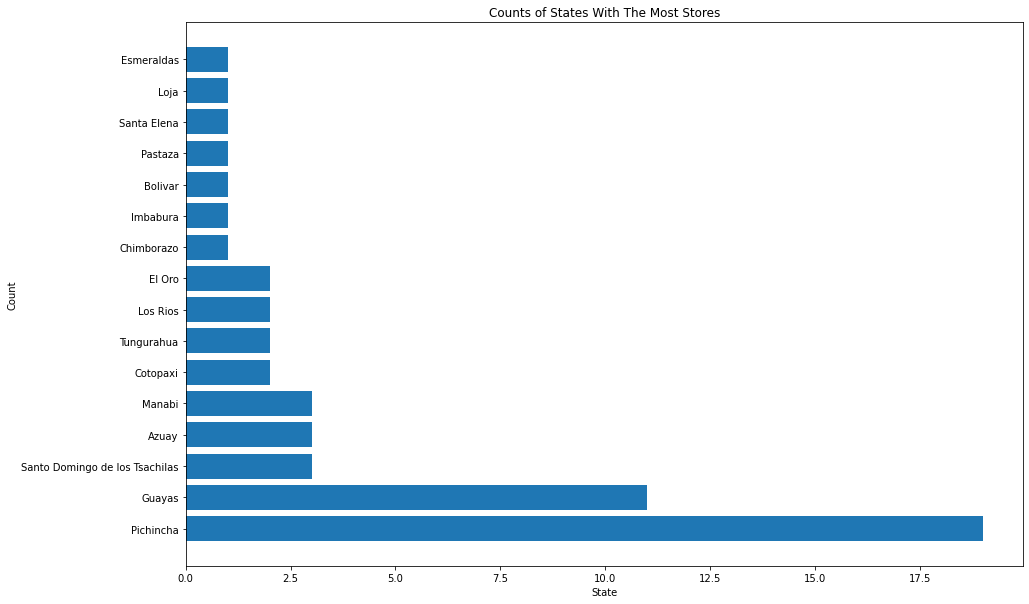

In [36]:
# Plotting the count of state column
plt.figure(figsize=(15, 10))
plt.barh(state_count.index, state_count.values)
plt.title('Counts of States With The Most Stores')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


The State with the highest count in this case tells us the state with the most store which happens to be **Pichincha** with a total of **19 Stores** 

##### Univariate Analysis of The Oil Data

In [37]:
# Preview the top rows of the oil data
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


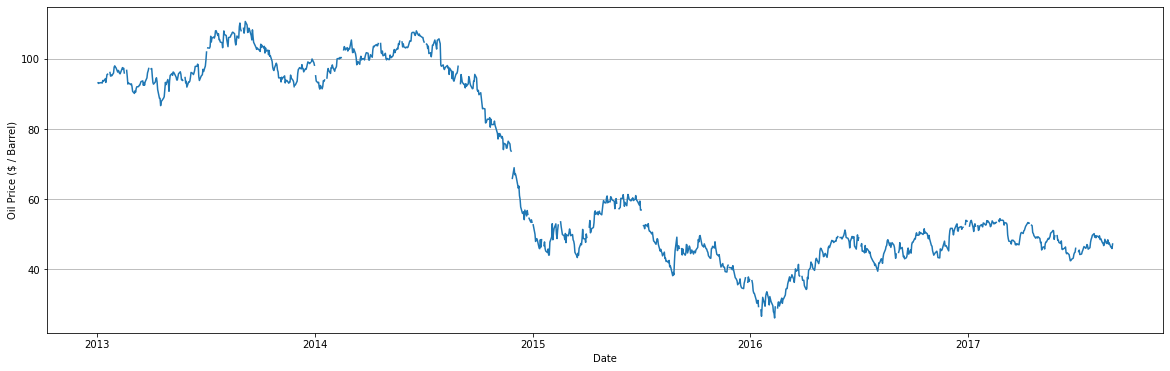

In [38]:
# Plotting a yearly oil price graph. The "dcoilwtico" indicates the Price in US Dollars
oil = pd.read_csv('oil.csv', index_col=["date"], parse_dates=True)

plt.figure(figsize=(20, 6))
plt.plot(oil)
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price ($ / Barrel)")
plt.show()

#### Looking closely at the graph, it is observed that the trend line appears to be faded at several points on the graph. This could be as a result of missing values in the data. Further analysis below will show this to be true. 

In [39]:
# Statiscal Analysis of the Oil data
dcoilwtico = oil['dcoilwtico']
print('Mean:', np.mean(dcoilwtico))
print('Median:', np.median(dcoilwtico))
print('Standard Deviation:', np.std(dcoilwtico))

Mean: 67.71436595744689
Median: nan
Standard Deviation: 25.619566822498353


### The above statistics returns a "nan" output for the median becuase there are missing values in the "dcoilwtico" column. In order to get rid of this, the nan values ought to be replaced with actual values. But since we cannot replace them with random values we must perform a missing value imputation to take care of this.

In [40]:
# First we check to see how many are missing values
oil['dcoilwtico'].isna().sum()

43

In [41]:
# Replacing the missing values with the median of "dcoilwtico" column
median = oil['dcoilwtico'].median()
oil['dcoilwtico'].fillna(median, inplace=True)


In [42]:
dcoilwtico = oil['dcoilwtico']
print('Mean:', np.mean(dcoilwtico))
print('Median:', np.median(dcoilwtico))
print('Standard Deviation:', np.std(dcoilwtico))

Mean: 67.2016009852218
Median: 53.19
Standard Deviation: 25.305627786781937


Now, for the median, we have **_53.19_** 

In [43]:
#fig, ax = plt.subplots(figsize=(10, 6))

#plt.hist(oil)
#plt.title('Distribution of Oil Price')
#plt.xlabel('Price of Oil ($/Barrell)')
#plt.ylabel('Frequency')
#plt.show()


<AxesSubplot:xlabel='dcoilwtico', ylabel='Density'>

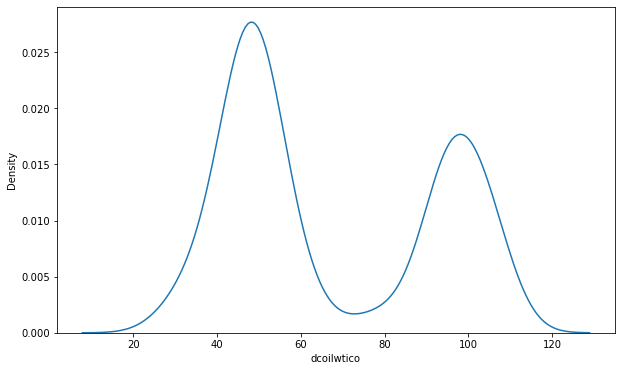

In [44]:
# Kernel density plot of oil data
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=oil['dcoilwtico'])

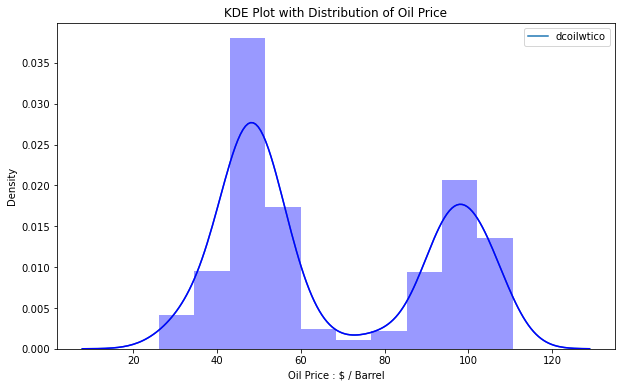

In [45]:
#Plotting a KDE with Distribution of the oil prices
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=oil, shade=False)
sns.distplot(oil, hist=True, rug=False, color='blue', label='Distribution')

# set plot parameters
plt.title('KDE Plot with Distribution of Oil Price')
plt.xlabel('Oil Price : $ / Barrel')
plt.ylabel('Density')

# show the plot
plt.show()

### BI-VARIATE ANALYSIS OF SOME DATASETS

##### Bivariate Analysis of the Train Data

In [48]:
# Previewing the top rows
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [49]:
# Fetching more information about the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [50]:
# Caculate the frequency count of each family
family_counts = train['family'].value_counts()

# Select the top 5 families based on theie frquency count
top_five_families = family_counts.head(5).index.tolist()

# Filter the train dataset to include only the rows with the top five families
family_top_five = train[train['family'].isin(top_five_families)]
family_top_five.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
17,17,2013-01-01,1,HOME APPLIANCES,0.0,0
29,29,2013-01-01,1,PREPARED FOODS,0.0,0
30,30,2013-01-01,1,PRODUCE,0.0,0
31,31,2013-01-01,1,SCHOOL AND OFFICE SUPPLIES,0.0,0


In [51]:
# listing the top five familes 
top_five_families = family_counts.head(5).index.tolist()
top_five_families

['AUTOMOTIVE',
 'HOME APPLIANCES',
 'SCHOOL AND OFFICE SUPPLIES',
 'PRODUCE',
 'PREPARED FOODS']

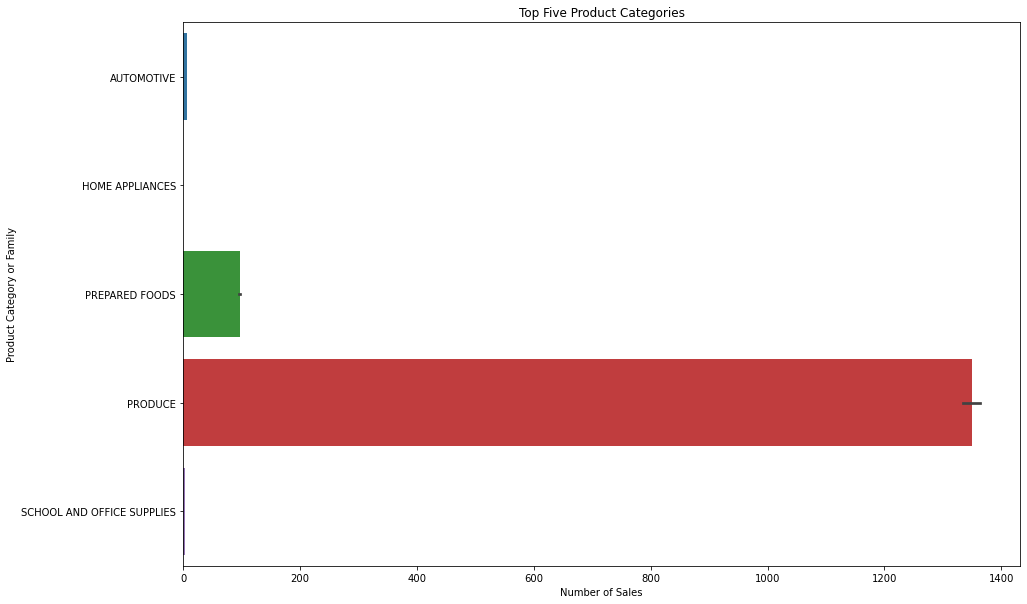

In [52]:
# Plotting the top five product family with the highest sales
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='sales', y='family', data=family_top_five)
plt.title('Top Five Product Categories')
plt.xlabel('Number of Sales')
plt.ylabel('Product Category or Family')
plt.show()

The barplot above shows **_"PRODUCE" has the highest sales of about 1,300_**

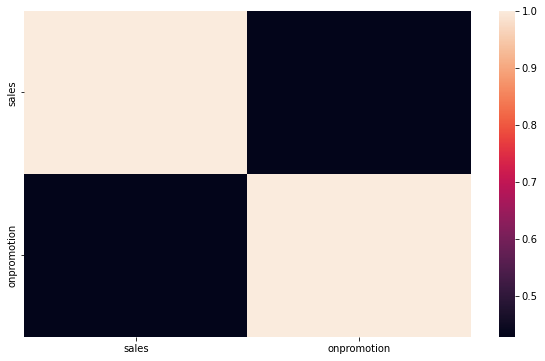

In [53]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 6))

# create a heatmap of two variables
sns.heatmap(train[['sales', 'onpromotion']].corr())

# show the plot
plt.show()


##### Bivariate Analysis of Holiday Event Data

In [54]:
# Prewiewing the top rows of the holiday_events data
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [55]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


From the information above, all the variables are objects with the exception of the "transferred" variable, which is a boolean. Furhter analysis is required to understand how the boolean (transferred) variable affects the data.

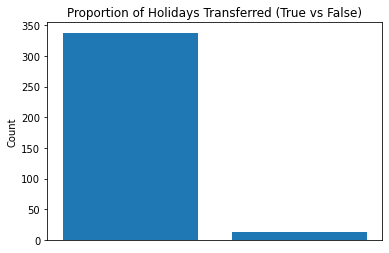

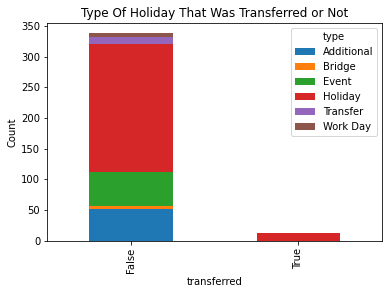

In [56]:
# Create a bar chart of the boolean variable
counts = holiday['transferred'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Proportion of Holidays Transferred (True vs False)')
plt.xticks([])
plt.ylabel('Count')
plt.show()

# Create a stacked bar chart of the boolean variable and a categorical variable
contingency_table = pd.crosstab(holiday['transferred'], holiday['type'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Type Of Holiday That Was Transferred or Not')
plt.ylabel('Count')
plt.show()


**_Both plots show the relationship between the holiday and wheather it was transferred or not.
The first plot shows the total count of holidays that were transferred from a weekend to a weekday. It shows that there were more holidays that were  not transfered than the the holidays that were._**

**_The second plot indicates the type of holiday that were not transferred against those that were transferred. We can tell from the legend that most of the holidyas which were not transferred were public holidays which fell on a weekday. Also the type of holidays that got transferred were also public holidays and this may incude but not limited to Easter holdays, Ramadan holidays, Christmas holidays etc._**

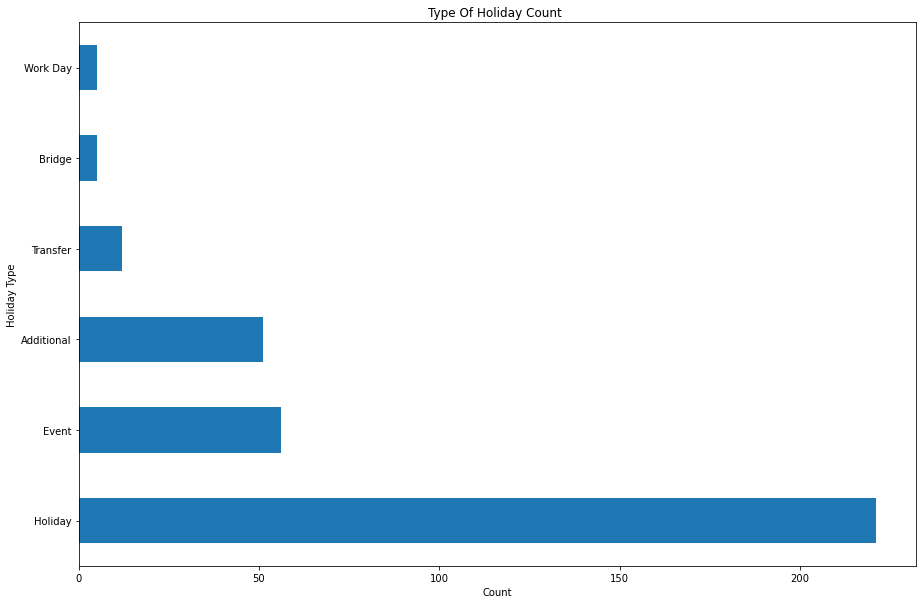

In [57]:
# Plotting a count of the type of holiday
fig, ax = plt.subplots(figsize=(15, 10))
holiday['type'].value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Holiday Type')
plt.title('Type Of Holiday Count ')
plt.show()

We can see that the most holidays were public hildays of about 200 counts and more, followed by Event with slightly above 50 counts and then Additional which was slightly below 50.

#### For Futher Analysis, we have to merge the data in order to answer the qestions.

In [61]:
# Merging the holiday data with the train data
train_data =train.merge(holiday_events, on='date',how='left')
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False


In [62]:
train_data.shape

(3054348, 11)

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   type         object 
 7   locale       object 
 8   locale_name  object 
 9   description  object 
 10  transferred  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 279.6+ MB


In [66]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83488 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_nbr     83488 non-null  int64
 1   transactions  83488 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [70]:
# Convert 'date' column in train_data to datetime64[ns]
train_data['date'] = pd.to_datetime(train_data['date'])

# Merge the transactions data with the new train_data
train_data_two = train_data.merge(transactions, on=['date', 'store_nbr'], how='left')
train_data_two.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [71]:
train_data_two.shape

(3054348, 12)

In [72]:
# Merge the oil data with the new train_data_two
train_data_three = train_data_two.merge(oil, on='date', how='left')
train_data_three.head()


,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19


In [73]:
train_data_three.shape

(3054348, 13)

In [74]:
# Merging the stores data with the new train_data_three
train_data_four = train_data_three.merge(stores, on='store_nbr', how='left')
train_data_four.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,transactions,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13


In [75]:
train_data_four.shape

(3054348, 17)

In [76]:
train_data_four.columns.tolist()

['id',
 'date',
 'store_nbr',
 'family',
 'sales',
 'onpromotion',
 'type_x',
 'locale',
 'locale_name',
 'description',
 'transferred',
 'transactions',
 'dcoilwtico',
 'city',
 'state',
 'type_y',
 'cluster']

### The resulting shape of the combined datasets shows after merging five seperate data (train, oil, holiday_events, stores and transactions), generates a new dataframe with ***_3054348_*** rows by ***_17_*** columns.

### Also upon listing the columns in the the new dataframe, it's observed that columns "type_x" and "type_y" are too similar in names and need to be changed for clarity. 

type_x = holiday_type: Indicating the type of holiday i.e Holiday, Event, Additional, etc.

type_y = store_type: This indicates the type of store i.e A, D, B, etc.

In [77]:
# Changing the column names for types_x and type_y
train_data_four.rename(columns={'type_x': 'holiday_type', 'type_y': 'store_type'}, inplace=True)
train_data_four.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,transactions,dcoilwtico,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13


In [78]:
train_data_four.columns.tolist()

['id',
 'date',
 'store_nbr',
 'family',
 'sales',
 'onpromotion',
 'holiday_type',
 'locale',
 'locale_name',
 'description',
 'transferred',
 'transactions',
 'dcoilwtico',
 'city',
 'state',
 'store_type',
 'cluster']

In [79]:
# save the DataFrame as a CSV file
train_data_four = pd.DataFrame(train_data_four)
train_data_four.to_csv('merge_combo.csv', index=False)

## Answering The Hypothesis and Questions

## Hypothesis & Questions 

#### 1. Is the train dataset complete (has all the required dates)?

In [80]:
# Read the train dataset
train_df = pd.read_csv('train.csv')

# Convert the date column to a datetime object
train_df['date'] = pd.to_datetime(train_df['date'])

# Get the start and end dates of the train dataset
start_date = train_df['date'].min()
end_date = train_df['date'].max()

# Create a dataframe with all the dates in the range of the train dataset
all_dates_df = pd.DataFrame(pd.date_range(start_date, end_date), columns=['date'])

# Check if all the dates in the range of the train dataset are present in the train dataset
print(all_dates_df.equals(train_df.groupby(['date']).size().reset_index(name='count')))


False


The above cell shows that the train dataset is **_incomplete._**

#### 2. Which dates have the lowest and highest sales for each year?

In [81]:
# Load the new merged data (merge_combo)
new_data = pd.read_csv('merge_combo.csv')

In [82]:
# Convert the date column to a datetime object
new_data['date'] = pd.to_datetime(new_data['date'])

# Extract the year from the date column and add it as a new column to the dataframe
new_data['year'] = new_data['date'].dt.year

# Group the dataframe by year and find the minimum and maximum sales for each year
min_sales = new_data.groupby('year')['sales'].min()
max_sales = new_data.groupby('year')['sales'].max()

# Print the results
print("Year\tLowest Sales\tHighest Sales")
for year in min_sales.index:
    print(f"{year}\t{min_sales[year]}\t\t{max_sales[year]}")

Year	Lowest Sales	Highest Sales
2013	0.0		46271.0
2014	0.0		45361.0
2015	0.0		40351.46
2016	0.0		124717.0
2017	0.0		38422.625


The above analysis shows that the lowest sales for each year is constant with sales of 0 while the highest was recorded in 2016 with a total sales of 124717.0

#### 3. Did the earthquake impact sales?

First, we need to verify the date of the earthquake as stipulated in the dataset, in the additional notes section.  From the problem statement, the earthquake occurred on **_April 16, 2016._** We can use this information to filter the sales data around this date.

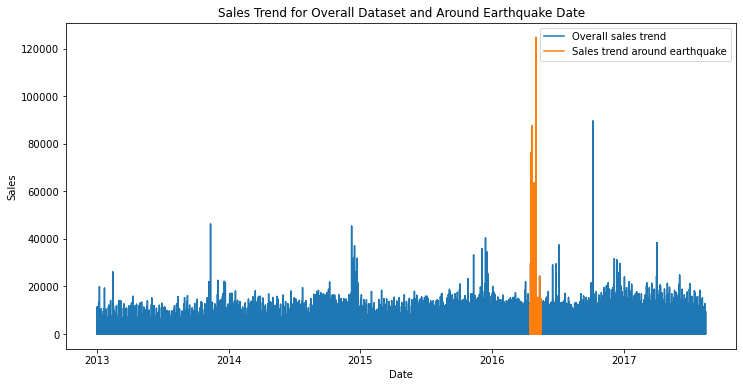

In [85]:
import datetime

# filter sales data around earthquake date
earthquake_date = '2016-04-16'
sales_earthquake = new_data[(new_data.date >= '2016-04-16') & (new_data.date <= '2016-05-15')]

# plot sales trend for entire dataset and around earthquake date
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(new_data['date'], new_data['sales'], label='Overall sales trend')
ax.plot(sales_earthquake['date'], sales_earthquake['sales'], label='Sales trend around earthquake')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Trend for Overall Dataset and Around Earthquake Date')
ax.legend()
plt.show()


Since the magnitude of the earthquae was quite strong and destructive, we assume that it must have taken a while for residents to recover from the shock and to go about thier regular daily routine. We assume about a month in order to capture the full extent of the impact of the earthquae on sales.
Observing the earthquake sales graph, shows a plot of two trends, one representing the sales around the earthquae period and the other for overall sales trend. As stated in the problem, the earthquae occurred on **_April 16, 2016._** The orange bars show that there was a huge rise in sales around the earthquae period as indicative of the graph.

It appears that the earthquuake did affect sales on the said date. From the plot, the orange line shows that there was a spike in sales. We could conclude the reason for this was that people wanted to replace the things they had lost in the eathquake and as a result purhased more for the stores than usual, possibly becuase the stores were not close to the epicentre of the earthquake.

#### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

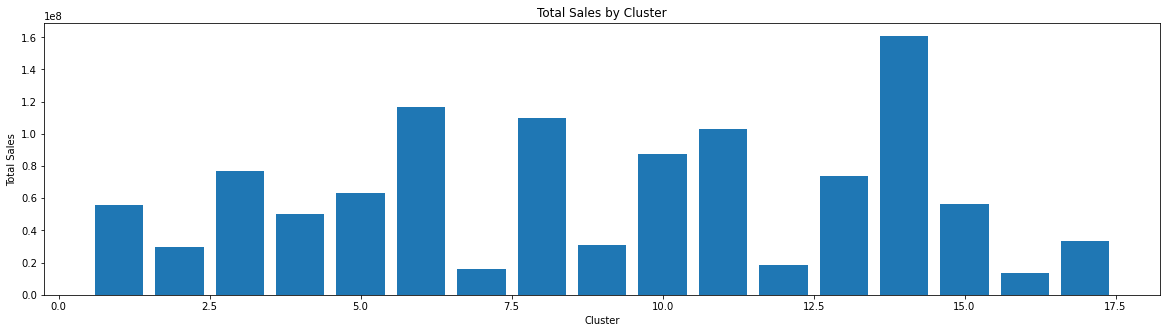

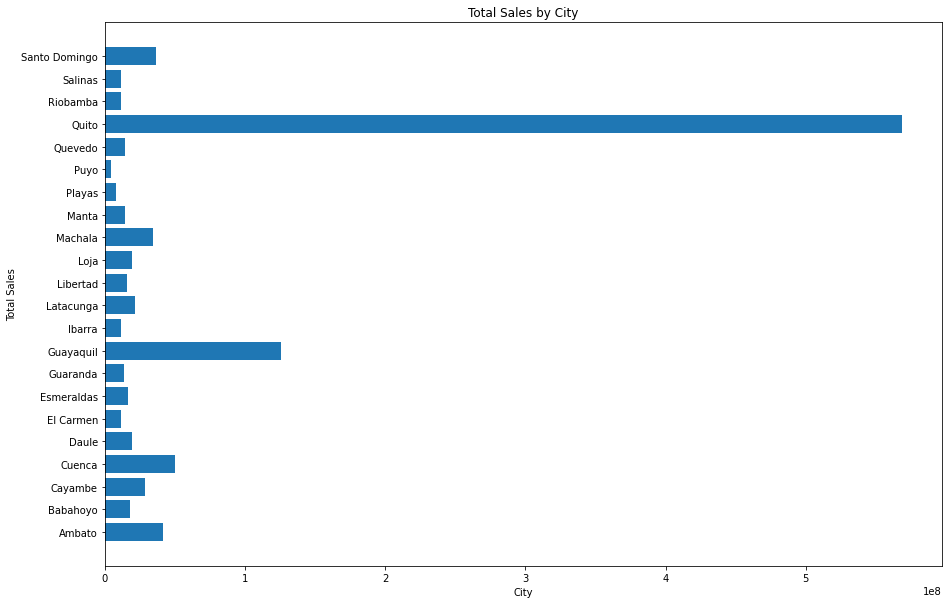

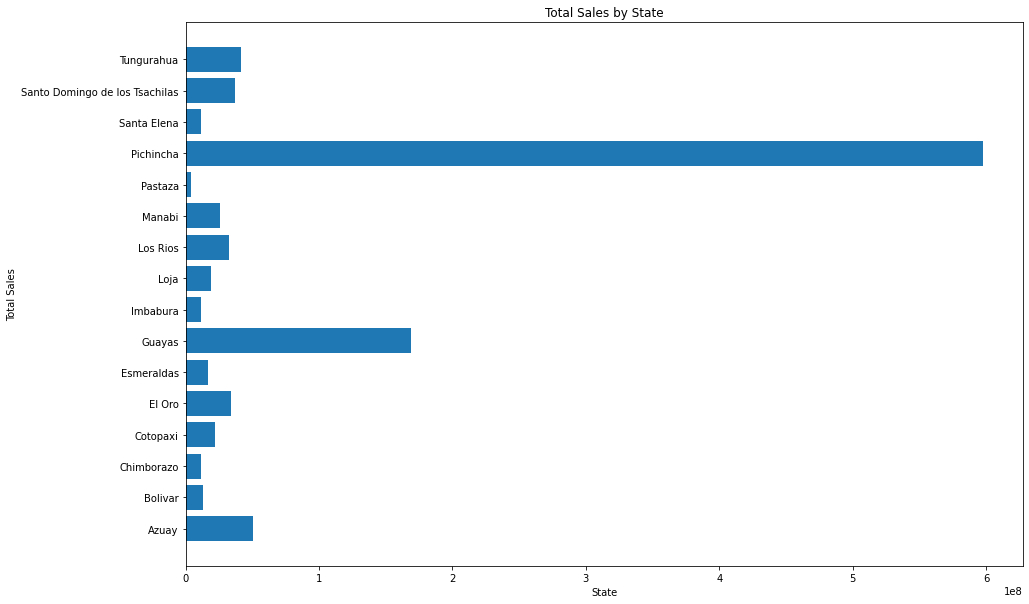

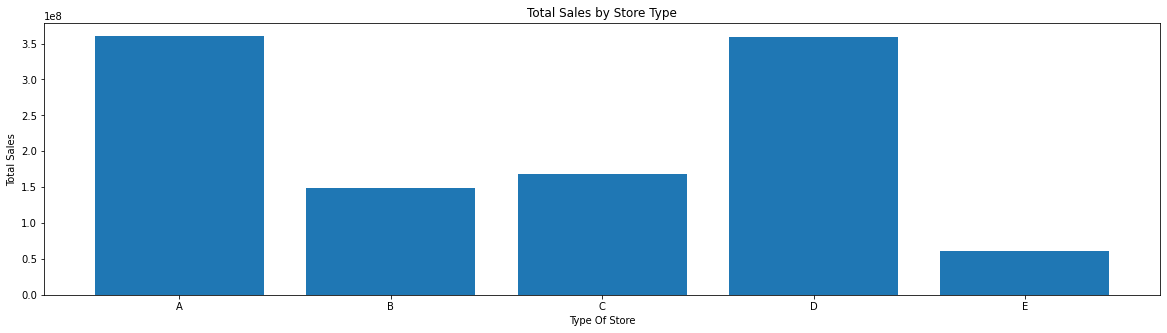

In [86]:
import matplotlib.pyplot as plt

# group sales by cluster
sales_by_cluster = new_data.groupby('cluster')['sales'].sum()

# plot sales by cluster
plt.figure(figsize=(20, 5))
plt.bar(sales_by_cluster.index, sales_by_cluster.values)
plt.title('Total Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.show()

# group sales by city
sales_by_city = new_data.groupby('city')['sales'].sum()

# plot sales by city
plt.figure(figsize=(15, 10))
plt.barh(sales_by_city.index, sales_by_city.values)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

# group sales by state
sales_by_state = new_data.groupby('state')['sales'].sum()

# plot sales by state
plt.figure(figsize=(15, 10))
plt.barh(sales_by_state.index, sales_by_state.values)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

# group sales by type
sales_by_type = new_data.groupby('store_type')['sales'].sum()

# plot sales by type
plt.figure(figsize=(20, 5))
plt.bar(sales_by_type.index, sales_by_type.values)
plt.title('Total Sales by Store Type')
plt.xlabel('Type Of Store')
plt.ylabel('Total Sales')
plt.show()


### **_The following observations were made from the above plots:_**

#### a. The category of stores that had the most sales are within ***_clusters 12.5 to 15._***

#### b. The city of ****_Quito_**** sold the most products.

#### c. **********_Pinchincha_********** is the state with the most sales.

#### d. The type of stores that sold the most products are **********_Type A and Type D_**********

### 5. Are sales affected by promotions, oil prices and holidays?

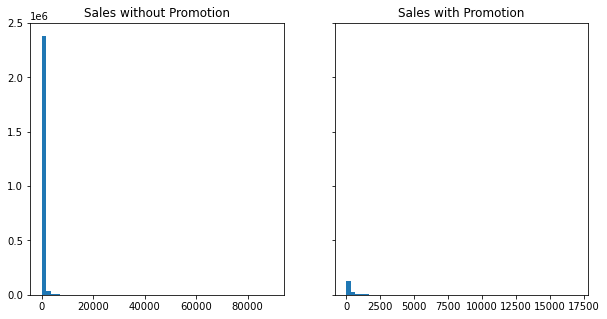

In [168]:
import matplotlib.pyplot as plt

no_promotion_sales = new_data[new_data["onpromotion"] == 0]["sales"]
promotion_sales = new_data[new_data["onpromotion"] == 1]["sales"]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))

ax1.hist(no_promotion_sales, bins=50)
ax1.set_title("Sales without Promotion")

ax2.hist(promotion_sales, bins=50)
ax2.set_title("Sales with Promotion")

plt.show()


#### The graphs above shows sales made when on promotion. Supprinsingly, more sales were made without promotion than there were sales when promotion was active

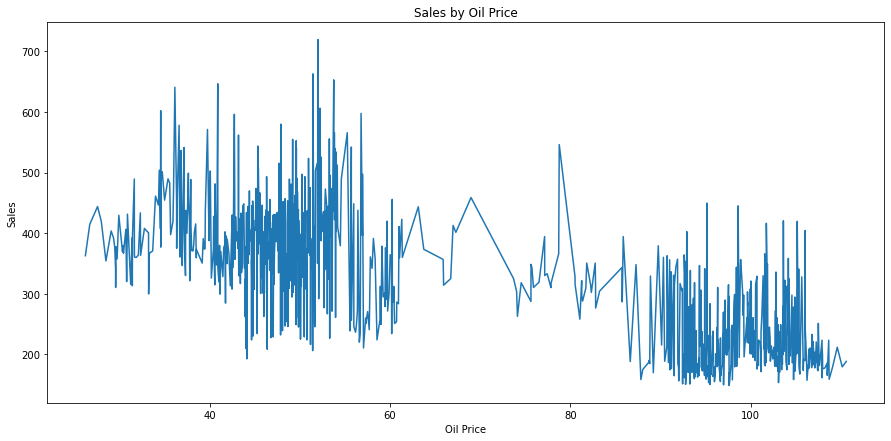

In [124]:
# Group the data by oil price and calculate the mean sales for each group
sales_by_oil = new_data.groupby('dcoilwtico')['sales'].mean()

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot(sales_by_oil.index, sales_by_oil.values)
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Sales by Oil Price')
plt.show()

#### When we take an average of the oil prices across the entire period, the plot shows that sales was high when the price of oil ranged between ( 40 to 60 )USD/Barrel. When there is an increase in the price of oil, sales plummeted when oil price ranged between 80 to 100 USD/Barrelll

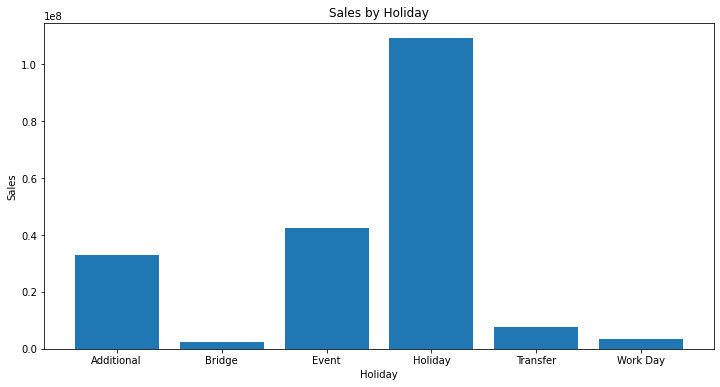

In [157]:
# group the data by holiday and sum the sales for each holiday
sales_by_holiday = new_data.groupby(['holiday_type'])['sales'].sum().reset_index()

# filter out holidays where sales were less than a certain threshold
threshold = 10000
sales_by_holiday = sales_by_holiday[sales_by_holiday['sales'] >= threshold]

# plot the sales by holiday
plt.figure(figsize=(12, 6))
plt.bar(sales_by_holiday['holiday_type'], sales_by_holiday['sales'])
plt.xticks(rotation=360)
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.title('Sales by Holiday')
plt.show()

Here, we see that there were more sales on holidays that were not transfered. This could either be on public holidays that fell on a weekday or holidays, like christmas, easter, etc.
The next holiday with th emost sales are Event, such as carnivals, independence the battle of pichincha, yuca festival etc.

### 6. What analysis can we get from the date and its extractable features?

<AxesSubplot:ylabel='year'>

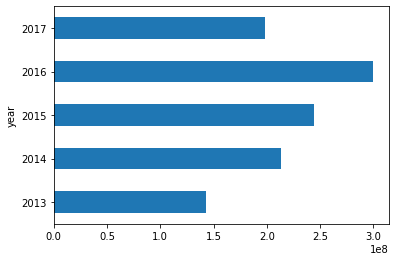

In [174]:
import pandas as pd

# Load the train dataset
new_data = pd.read_csv('merge_combo.csv', parse_dates=['date'], index_col=['date'])

# Add columns for year, month, day, and day of week
new_data['year'] = new_data.index.year
new_data['month'] = new_data.index.month
new_data['day'] = new_data.index.day
new_data['dayofweek'] = new_data.index.dayofweek
new_data['day_name'] = new_data.index.day_name()

# Seasonality analysis
new_data.groupby('year')['sales'].sum().plot(kind='barh')




This graph shows how sales had increased ***_year on year from 2013 to 2016._***
Upon extracting the year feature, we see that that the year that recorded the highest sales was 2016, despite having a devastating earthquake that year.

<AxesSubplot:xlabel='date'>

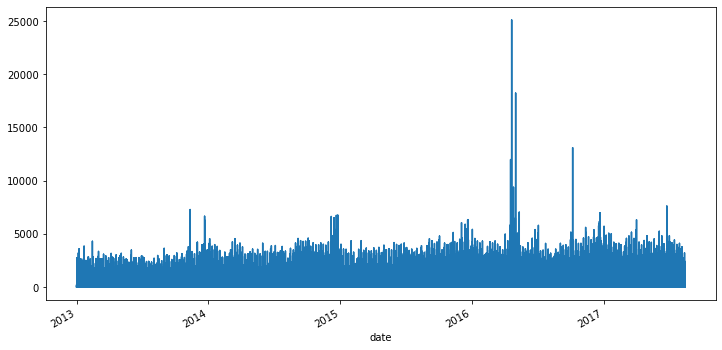

In [175]:

# Trend analysis
fig, ax = plt.subplots(figsize=(12, 6))
new_data['sales'].rolling(window=7, center=True).mean().plot()


The trend analysis shows that there was an unsusual spike in sales in the year 2016, possibly around the same period as the earthquake. Besides the earthquake, generally, the graph depicts that there were slightly higher sales towards the end of each year and preceeding the early days into the new year

<AxesSubplot:ylabel='day_name'>

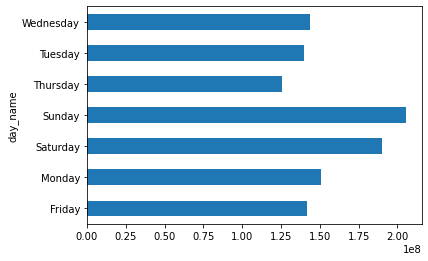

In [177]:

# Day of the week analysis
new_data.groupby('day_name')['sales'].sum().plot(kind='barh')

For analysis on week, we observe that the day when most sales are recorded happens to be on weekends (saturdays and sundays)

### FEATURE ENGINEERING

**From the EDA , and univariate and bivariate analysis we have already identified relevant and "irrelevant data" in view of our business objectives.**

1. Remove irrelvant features and create new features for our dataset

2. Identifying and handling duplicate records

3. Filling in missing values and handling outliers

4. Converting the data into a format that is more suitable for training, I.e Date column to datetime format etc. This can include normalizing numerical data.





In [7]:
# Load the new merged data (merge_combo)
ml_data = pd.read_csv('merge_combo.csv')
ml_data['date'] = pd.to_datetime(ml_data['date'])
ml_data.head()

C:\Users\DEVICES\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,transactions,dcoilwtico,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,53.19,Quito,Pichincha,D,13


In [8]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  transactions  float64       
 12  dcoilwtico    float64       
 13  city          object        
 14  state         object        
 15  store_type    object        
 16  cluster       int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 396.1+ MB


In [9]:
# Create features for day, month, year, day of week, and week of year
ml_data['day'] = ml_data['date'].dt.day
ml_data['month'] = ml_data['date'].dt.month
ml_data['year'] = ml_data['date'].dt.year
ml_data['day_of_week'] = ml_data['date'].dt.dayofweek
ml_data['week_of_year'] = ml_data['date'].dt.weekofyear
ml_data['weekend'] = (ml_data['day_of_week'] >= 5).astype(int)

C:\Users\DEVICES\AppData\Local\Temp/ipykernel_9864/1337448666.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ml_data['week_of_year'] = ml_data['date'].dt.weekofyear


In [10]:
ml_data.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,day,month,year,day_of_week,week_of_year,weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1,1,2013,1,1,0
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1,1,2013,1,1,0
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1,1,2013,1,1,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1,1,2013,1,1,0
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1,1,2013,1,1,0


In [11]:
ml_data.shape

(3054348, 23)

In [12]:
# Add holiday and event flags
ml_data['holiday'] = (~ml_data['holiday_type'].isnull()).astype(int)
ml_data['event'] = (~ml_data['locale'].isnull()).astype(int)
ml_data.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,store_type,cluster,day,month,year,day_of_week,week_of_year,weekend,holiday,event
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,D,13,1,1,2013,1,1,0,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,D,13,1,1,2013,1,1,0,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,D,13,1,1,2013,1,1,0,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,D,13,1,1,2013,1,1,0,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,D,13,1,1,2013,1,1,0,1,1


In [13]:
ml_data.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions     249117
dcoilwtico       878526
city                  0
state                 0
store_type            0
cluster               0
day                   0
month                 0
year                  0
day_of_week           0
week_of_year          0
weekend               0
holiday               0
event                 0
dtype: int64

In [14]:
# Fill in missing values
ml_data['dcoilwtico'].fillna(method='ffill', inplace=True)
ml_data['transactions'].fillna(0, inplace=True)
ml_data.tail()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,store_type,cluster,day,month,year,day_of_week,week_of_year,weekend,holiday,event
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,B,6,15,8,2017,1,33,0,1,1
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,...,B,6,15,8,2017,1,33,0,1,1
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,...,B,6,15,8,2017,1,33,0,1,1
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,...,B,6,15,8,2017,1,33,0,1,1
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,B,6,15,8,2017,1,33,0,1,1


In [15]:
ml_data.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions          0
dcoilwtico            0
city                  0
state                 0
store_type            0
cluster               0
day                   0
month                 0
year                  0
day_of_week           0
week_of_year          0
weekend               0
holiday               0
event                 0
dtype: int64

In [16]:
# Drop unnecessary columns
ml_data.drop(['id', 'holiday_type', 'store_nbr', 'family', 'store_type','locale', 'locale_name', 'description', 'cluster', 'state', 'city',
            'transferred',], axis=1, inplace=True)


In [17]:
ml_data.head()

,date,sales,onpromotion,transactions,dcoilwtico,day,month,year,day_of_week,week_of_year,weekend,holiday,event
0,2013-01-01,0.0,0,0.0,53.19,1,1,2013,1,1,0,1,1
1,2013-01-01,0.0,0,0.0,53.19,1,1,2013,1,1,0,1,1
2,2013-01-01,0.0,0,0.0,53.19,1,1,2013,1,1,0,1,1
3,2013-01-01,0.0,0,0.0,53.19,1,1,2013,1,1,0,1,1
4,2013-01-01,0.0,0,0.0,53.19,1,1,2013,1,1,0,1,1


In [18]:
ml_data.shape

(3054348, 13)

In [19]:
ml_data.describe()

,sales,onpromotion,transactions,dcoilwtico,day,month,year,day_of_week,week_of_year,weekend,holiday,event
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06
mean,3.590209e+02,2.617480e+00,1.558656e+03,6.739778e+01,1.565694e+01,6.222870e+00,2.014842e+03,3.008168e+00,2.530863e+01,2.876313e-01,1.645274e-01,1.645274e-01
std,1.107286e+03,1.225494e+01,1.036468e+03,2.535679e+01,8.801398e+00,3.374251e+00,1.345607e+00,2.001442e+00,1.475051e+01,4.526584e-01,3.707535e-01,3.707535e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,1.000000e+00,2.013000e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,9.310000e+02,4.663000e+01,8.000000e+00,3.000000e+00,2.014000e+03,1.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.100000e+01,0.000000e+00,1.332000e+03,5.319000e+01,1.600000e+01,6.000000e+00,2.015000e+03,3.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.960110e+02,0.000000e+00,1.980000e+03,9.547000e+01,2.300000e+01,9.000000e+00,2.016000e+03,5.000000e+00,3.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00
max,1.247170e+05,7.410000e+02,8.359000e+03,1.106200e+02,3.100000e+01,1.200000e+01,2.017000e+03,6.000000e+00,5.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00


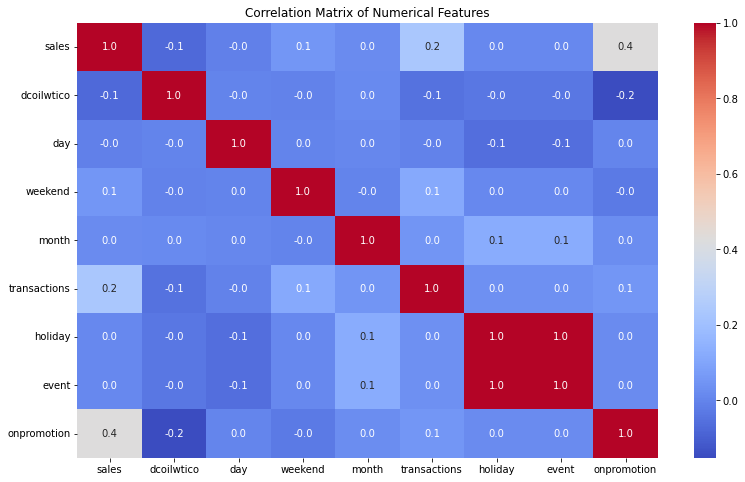

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_cols = ['sales', 'dcoilwtico', 'day', 'weekend','month', 'transactions', 'holiday', 'event', 'onpromotion']

# Create a correlation matrix
corr_matrix = ml_data[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(13,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### Splitting the data set for modeing

In [ ]:
# save the DataFrame as a CSV file
ml_data = pd.DataFrame(ml_data)
ml_data.to_csv('new_ml_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = new_ml_data.drop('sales', axis=1)
y = new_ml_data['sales']

# Split data into 80% training and 20% testing sets
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Verify the target column name
#target_col = y.sales


### AR Model

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Assign the Sales column to X_train
X_train = new_ml_data["sales"]

# Create plots of the PACF and ACF
pacf = plot_pacf(X_train, lags=10)
acf = plot_acf(X_train, lags=10)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(new_ml_data, lags = 5).fit()
model.summary()

In [ ]:
AR_pred = model.predict(start = len(X_train), 
                           end = len(X_train)+len(y_train)-1,
                           dynamic = False
                           )

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(X_train['Sales'], label='Train')
plt.plot(y_train['Sales'], label='Test')
plt.plot(AR_pred , label='AR forecast')
plt.legend(loc='best')
plt.title('Auto Regressive method')
plt.show()

In [ ]:
# Evaluate our models
mse = mean_squared_error(y_test, AR_pred)
msle = mean_squared_log_error(y_test, AR_pred)
rmse = np.sqrt(mean_squared_error(y_test, AR_pred)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, AR_pred)).round(2)

results = pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

### ARIMA 

In [ ]:
# We use pmdarima to determine the best parameter for our ARIMA model.
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(new_ml_data["Sales"], trace = True, suppress_warnings = True)
stepwise_fit.summary()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(new_ml_data, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

In [ ]:
# Make predictions on the test data
ARIMA_pred = model_fit.predict(start = len(new_ml_data), 
                               end = len(new_ml_data)+len(y_test)-1,
                               typ="levels")
print(ARIMA_pred)

In [ ]:
# Plot train, test and prediction values
plt.figure(figsize=(12,4))
plt.plot(new_ml_data['Sales'], label='Train')
plt.plot(y_test['Sales'], label='Test')
plt.plot(ARIMA_pred, label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive Integrated Moving Average (ARIMA) method')
plt.show()

In [ ]:
# Evaluate our models
mse = mean_squared_error(y_test, ARIMA_pred)
msle = mean_squared_log_error(y_test, ARIMA_pred)
rmse = np.sqrt(mean_squared_error(y_test, ARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, ARIMA_pred)).round(2)

model_results = pd.DataFrame([['ARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data1, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
model_fit.summary()

In [ ]:
# Make predictions on the test data
SARIMA_pred = model_fit.predict(start = len(train_data1), 
                               end = len(train_data1)+len(test_data1)-1,
                               typ="levels")
print(SARIMA_pred)

In [ ]:
# Plot train, test and prediction values
plt.figure(figsize=(12,4))
plt.plot(train_data1['Sales'], label='Train')
plt.plot(test_data1['Sales'], label='Test')
plt.plot(SARIMA_pred, label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) method')
plt.show()

In [ ]:
# Evaluate our models
mse = mean_squared_error(test_data1, SARIMA_pred)
msle = mean_squared_log_error(test_data1, SARIMA_pred)
rmse = np.sqrt(mean_squared_error(test_data1, SARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(test_data1, SARIMA_pred)).round(2)

model_results = pd.DataFrame([['SARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results